#### References
- https://stackoverflow.com/questions/13310594/positioning-the-colorbar/43425119#43425119
- https://frhyme.github.io/python-lib/change-subplot-size/
- https://matplotlib.org/stable/gallery/axes_grid1/demo_colorbar_with_axes_divider.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.random.rand(14,16)

### 1. using pad

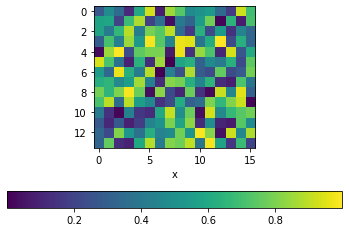

In [3]:
fig, ax = plt.subplots()
im = ax.imshow(data)
ax.set_xlabel("x")

cb = fig.colorbar(im, orientation='horizontal', pad=0.2)

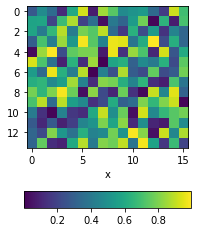

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(data)
ax.set_xlabel("x")
cb = fig.colorbar(im, orientation='horizontal', pad=0.2, shrink=0.5, aspect=10)

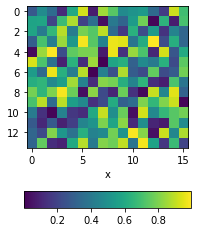

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(data)
ax.set_xlabel("x")
cb = fig.colorbar(im, orientation='horizontal', pad=0.2, shrink=0.5, aspect=10)

### 2. using axes divider

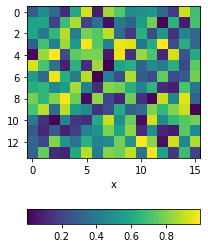

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
im = ax.imshow(data)
ax.set_xlabel("x")

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="10%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")

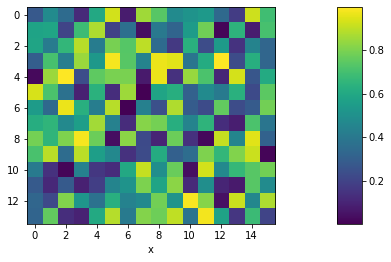

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
im = ax.imshow(data)
ax.set_xlabel("x")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad="25%")
fig.colorbar(im, cax=cax, orientation="vertical")

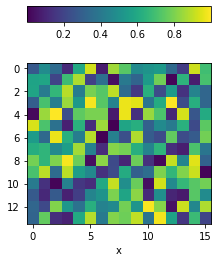

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
im = ax.imshow(data)
ax.set_xlabel("x")

divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="10%", pad="25%")
fig.colorbar(im, cax=cax, orientation="horizontal")

### 3. using subplots
- subplots() with gridspec_kw
- add_subplot()
- add_axes()
- grid_spec & add_subplot()

### 1) subplots() with grid_spec

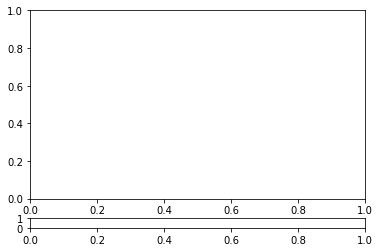

In [13]:
fig, (ax, cax) = plt.subplots(2,1, gridspec_kw={"height_ratios":[1, 0.05]})

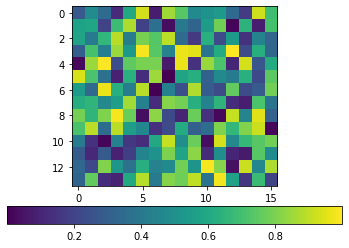

In [14]:
fig, (ax, cax) = plt.subplots(2,1, gridspec_kw={"height_ratios":[1, 0.1]})
im = ax.imshow(data)
ax.set_xlabel("x")

fig.colorbar(im, cax=cax, orientation='horizontal')

### 2) add_subplot()

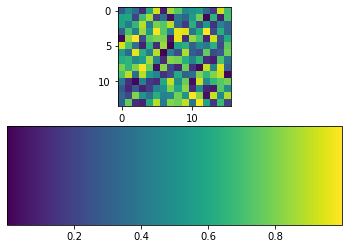

In [15]:
fig= plt.figure()
ax = fig.add_subplot(2,1,1)
cax = fig.add_subplot(2,1,2)

im = ax.imshow(data)
ax.set_xlabel("x")
fig.colorbar(im, cax=cax, orientation='horizontal')

#### <span style="color:red">Colorbar 의 크기를 조정하기가 쉽지 않다.<span>

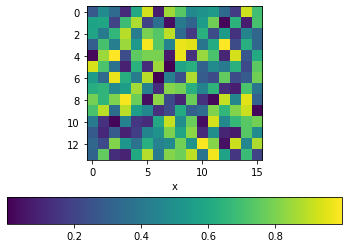

In [16]:
fig= plt.figure()
ax = fig.add_subplot(1,1,1)

# ref: https://www.tutorialspoint.com/changing-matplotlib-subplot-size-position-after-axes-creation
from matplotlib import gridspec as gridspec
gs = gridspec.GridSpec(7,1)
ax.set_position(gs[0:5].get_position(fig))
ax.set_subplotspec(gs[0:5])
cax = fig.add_subplot(gs[6])

im = ax.imshow(data)
ax.set_xlabel("x")
fig.colorbar(im, cax=cax, orientation='horizontal')

### 3) add_axes

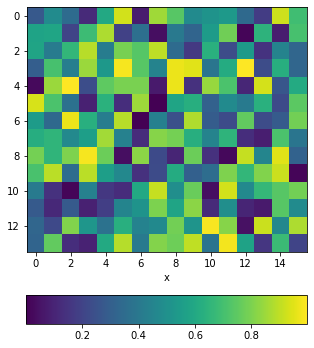

In [17]:
fig= plt.figure()
ax = fig.add_axes([0.1,0.35,0.85,0.85])
cax = fig.add_axes([0.2,0.1,0.65,0.10])

im = ax.imshow(data)
ax.set_xlabel("x")
fig.colorbar(im, cax=cax, orientation='horizontal')

### 4) grid_spec & add_subplot()

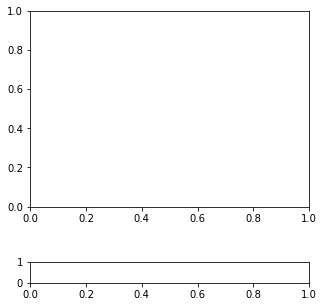

In [18]:
from matplotlib import gridspec as gridspec

fig = plt.figure(figsize=(5,5))
spec = gridspec.GridSpec(25,1, hspace=0.05)

ax = fig.add_subplot(spec[0:18,0])
cax = fig.add_subplot(spec[-2:,0])


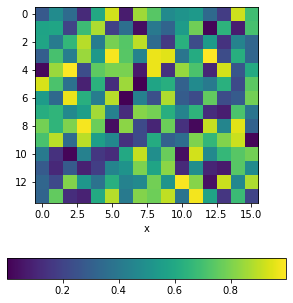

In [19]:
from matplotlib import gridspec as gridspec

fig = plt.figure(figsize=(5,5))
spec = gridspec.GridSpec(25,1, hspace=0.05)

ax = fig.add_subplot(spec[0:18,0])
cax = fig.add_subplot(spec[-2:,0])

im = ax.imshow(data)
ax.set_xlabel("x")
fig.colorbar(im, cax=cax, orientation='horizontal')